<a href="https://colab.research.google.com/github/gabrfern99/lia1_2024_1/blob/main/Entregas%20-%20Gabriel%20Fernando/Ci%C3%AAncia_de_Dados_Policia_Federal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [39]:
file_path = "/PALAS_OPERACOES_2023_12.csv"
try:
    df = pd.read_csv(file_path, delimiter=';', encoding='latin-1')
    print("CSV file loaded successfully.")
    print(df.head())
except Exception as e:
    print("Error reading CSV file:", e)

CSV file loaded successfully.
               Checksum Id Operacao Data do Inicio Data da Deflagracao  \
0  ef13fd2e65b1e420cf22a3bea3da3a26     31/12/2023          31/12/2023   
1  253b6d8b0a660276b04dd9694e50b123     31/12/2023          31/12/2023   
2  86b474a966e0cc8faf1092967eaf82f4     15/09/2023          30/12/2023   
3  82b1642f9216beae52eaa1ca8e0e6330     21/09/2023          30/12/2023   
4  97a0b256b73505382d3bbd1eac096563     06/10/2023          30/12/2023   

    Tipo de Operacao                                               Area  \
0  Operacao Simples   Crimes Fazendários                            ...   
1  Operacao Simples   Tráfico de Drogas                             ...   
2  Operacao Simples   Crimes Fazendários                            ...   
3  Operacao Simples   Crimes Fazendários                            ...   
4  Operacao Simples   Crimes Fazendários                            ...   

  Sigla Unidade Federativa                        Sigla Unidade Institucio

In [40]:
df.tail()

,Checksum Id Operacao,Data do Inicio,Data da Deflagracao,Tipo de Operacao,Area,Sigla Unidade Federativa,Sigla Unidade Institucional,Atuacao em Territorio Indigena,Atuacao em Territorio de Fronteira,Qtd Prisao em Flagrante,...,Proib Ausentar Comarca,Proib Acesso ou Freq,Comparecimento Juizo,Qtd Fianca,Qtd Internacao Prov,Proib Contato,Mand Jud Caut Assec,Recol Domic Noturno,Susp Ex Func Pub A E,Monit Eletronica
681,818d725171c868e5bc58c82794c408f2,02/12/2023,02/12/2023,Operacao de Apoio,Tráfico de Drogas ...,SE,SR/PF/SE ...,Nao,...,0,...,0,0,0,0,0,0,0,0,0,0
682,8ad439a301c8178f63f271abc3687940,02/12/2023,02/12/2023,Operacao Simples,Tráfico de Drogas ...,RJ,DPF/AIN/RJ ...,Nao,...,1,...,0,0,0,0,0,0,0,0,0,0
683,4aaac55b37f3522763699c33a10d7f9a,02/12/2023,02/12/2023,Operacao Simples,Tráfico de Drogas ...,RJ,DPF/AIN/RJ ...,Nao,...,1,...,0,0,0,0,0,0,0,0,0,0
684,3d8858b9b87e533499f4f3cf562aba81,02/12/2023,02/12/2023,Operacao Simples,Crimes Fazendários ...,SP,DPF/CAS/SP ...,Nao,...,0,...,0,0,0,0,0,0,0,0,0,0
685,f8be22b5f7a9c77c22686ce463e21b77,02/12/2023,02/12/2023,Operacao Simples,Tráfico de Drogas ...,SP,DPF/CAS/SP ...,Nao,...,2,...,0,0,0,0,0,0,0,0,0,0


### Preprocessa uma parte do dataset

In [44]:
# Removendo linhas com valores ausentes na coluna 'Qtd Prejuizos Causados a Uniao'
df.dropna(subset=['Qtd Prejuizos Causados a Uniao'], inplace=True)

In [48]:
# Removendo o prefixo 'R$' e substituindo vírgulas por pontos
df['Qtd Prejuizos Causados a Uniao'] = df['Qtd Prejuizos Causados a Uniao'].str.replace('R$', '').str.replace(',', '').str.replace('.', '')

In [62]:
# Remover "..." e espaços em branco adicionais da coluna 'Area'
df['Area'] = df['Area'].str.replace('\.\.\.', '').str.strip()

# 1. **Qual** o total de valores apreendidos em operações de tráfico de drogas em território de fronteira?

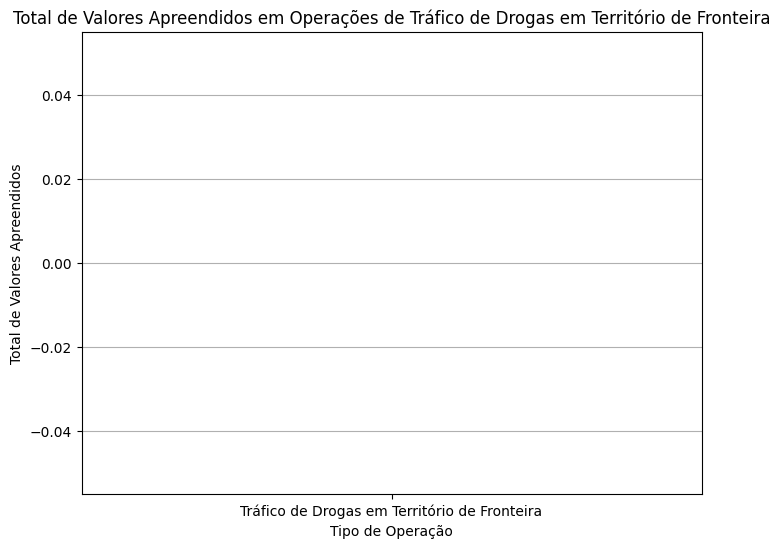

In [21]:
# Converter a coluna 'Data da Deflagracao' para o tipo datetime
df['Data da Deflagracao'] = pd.to_datetime(df['Data da Deflagracao'], format='%d/%m/%Y', errors='coerce')

# Remover o símbolo "R$" e converter os valores para inteiros
df['Valor_Venda'] = df['Valor_Venda'].replace('[\$,]', '', regex=True).astype(float)

# Filtrar as operações de tráfico de drogas em território de fronteira
trafico_fronteira = df[df['Tipo de Operacao'].str.contains('Tráfico de Drogas', na=False) & df['Atuacao em Territorio de Fronteira'].str.contains('Sim', na=False)]

# Calcular o total de valores apreendidos nessas operações
total_valores_apreendidos_por_operacao = trafico_fronteira.groupby('ID_Pedido')['Valor_Venda'].sum()

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
total_valores_apreendidos_por_operacao.plot(kind='bar', color='skyblue')
plt.xlabel('ID do Pedido')
plt.ylabel('Total de Valores Apreendidos')
plt.title('Total de Valores Apreendidos em Operações de Tráfico de Drogas em Território de Fronteira (Por Operação)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2.Qual o valor total dos prejuízos causados à União em operações de acordo com diferentes áreas

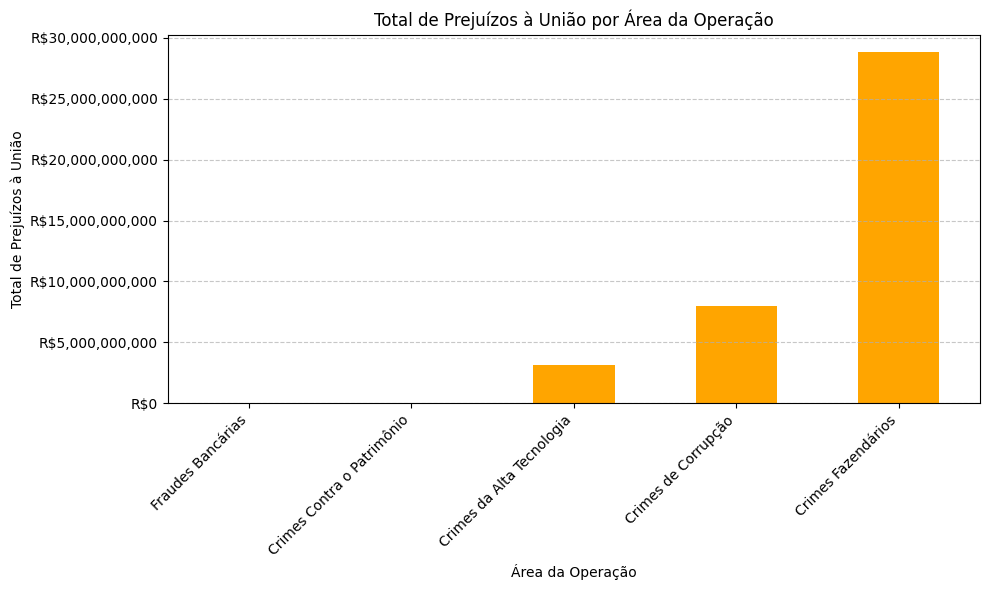

In [68]:
# Agrupar por área e calcular o total de prejuízos em cada área
prejuizos_por_area = df.groupby('Area')['Qtd Prejuizos Causados a Uniao'].sum().sort_values()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
prejuizos_por_area.plot(kind='bar', color='orange')
plt.xlabel('Área da Operação')
plt.ylabel('Total de Prejuízos à União')
plt.title('Total de Prejuízos à União por Área da Operação')

# Formatar rótulos do eixo Y em formato de moeda (R$)
formatter = ticker.FuncFormatter(lambda x, pos: 'R${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Qual o valor total dos prejuízos causados à União em operações com monitoramento eletrônico?

Qual a quantidade total de prisões em flagrante realizadas em cada unidade federativa?